In [1]:
import pandas as pd

# Load the provided CSV file
file_path = '/Users/samanyukamra/Dropbox/Mac/Documents/downloadss/final_hp.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
data.head()


,Unnamed: 0,overall,reviewTime,reviewerID,asin,reviewText,title,brand
0,0,5.0,"02 28, 2013",A15U5NUS1EY7IQ,B000001OMI,I'm getting listening stations going in severa...,maxell 190318 lightweight adjustable open air ...,Maxell
1,1,5.0,"10 17, 2012",AHGGNAIT6BH5X,B000001OMI,Needed Headset for watching and editing videos...,maxell 190318 lightweight adjustable open air ...,Maxell
2,2,4.0,"09 27, 2012",A33HUURDJ4DVG3,B000001OMI,I was out of town for a month and needed a pai...,maxell 190318 lightweight adjustable open air ...,Maxell
3,3,5.0,"11 27, 2008",A680RUE1FDO8B,B000001OMI,Obviously these headphones are not for the aud...,maxell 190318 lightweight adjustable open air ...,Maxell
4,4,3.0,"12 24, 2007",A3OLAZKM77XR6P,B000001OMI,I bought these headphones at a Tower Records a...,maxell 190318 lightweight adjustable open air ...,Maxell


# Descriptive Statistics

In [2]:
# Descriptive Statistics

# a. Number of Reviews
num_reviews = len(data)

# b. Average Rating Score
average_rating = data['overall'].mean()

# c. Number of Unique Products
num_unique_products = data['asin'].nunique()

# d. Number of Good Ratings
num_good_ratings = data[data['overall'] >= 3]['overall'].count()

# e. Number of Bad Ratings
num_bad_ratings = data[data['overall'] < 3]['overall'].count()

# f. Number of Reviews corresponding to each Rating
reviews_per_rating = data['overall'].value_counts().sort_index()


In [3]:
# Formatting and printing the descriptive statistics

print("Descriptive Statistics for the Dataset:\n")
print(f"a. Number of Reviews: {num_reviews}")
print(f"b. Average Rating Score: {average_rating:.2f}")
print(f"c. Number of Unique Products: {num_unique_products}")
print(f"d. Number of Good Ratings (≥ 3): {num_good_ratings}")
print(f"e. Number of Bad Ratings (< 3): {num_bad_ratings}")
print("f. Number of Reviews corresponding to each Rating:")
for rating, count in reviews_per_rating.items():
    print(f"   - {int(rating)} star: {count}")


Descriptive Statistics for the Dataset:

a. Number of Reviews: 193841
b. Average Rating Score: 4.06
c. Number of Unique Products: 3887
d. Number of Good Ratings (≥ 3): 164542
e. Number of Bad Ratings (< 3): 29299
f. Number of Reviews corresponding to each Rating:
   - 1 star: 15311
   - 2 star: 13988
   - 3 star: 20516
   - 4 star: 38892
   - 5 star: 105134


In [4]:
data = data.drop(["Unnamed: 0"],axis = 1)

In [5]:
data

,overall,reviewTime,reviewerID,asin,reviewText,title,brand
0,5.0,"02 28, 2013",A15U5NUS1EY7IQ,B000001OMI,I'm getting listening stations going in severa...,maxell 190318 lightweight adjustable open air ...,Maxell
1,5.0,"10 17, 2012",AHGGNAIT6BH5X,B000001OMI,Needed Headset for watching and editing videos...,maxell 190318 lightweight adjustable open air ...,Maxell
2,4.0,"09 27, 2012",A33HUURDJ4DVG3,B000001OMI,I was out of town for a month and needed a pai...,maxell 190318 lightweight adjustable open air ...,Maxell
3,5.0,"11 27, 2008",A680RUE1FDO8B,B000001OMI,Obviously these headphones are not for the aud...,maxell 190318 lightweight adjustable open air ...,Maxell
4,3.0,"12 24, 2007",A3OLAZKM77XR6P,B000001OMI,I bought these headphones at a Tower Records a...,maxell 190318 lightweight adjustable open air ...,Maxell
...,...,...,...,...,...,...,...
193836,5.0,"02 28, 2017",AUNMCFIJ4WL57,B01G6SUDN8,Good price and works exactly as described. No...,"wscsr bluetooth headphones earbuds, lightweigh...",TNSO
193837,5.0,"02 4, 2017",A1MZDK7Q432O1L,B01G6SUDN8,"No muss no fuss, simple plug and play. Period...","wscsr bluetooth headphones earbuds, lightweigh...",TNSO
193838,5.0,"06 24, 2016",A2E0M7R1KEKS3P,B01G6SUDN8,Without installing drives. Just plug and play....,"wscsr bluetooth headphones earbuds, lightweigh...",TNSO
193839,5.0,"06 22, 2016",ATVXKXN2491HG,B01G6SUDN8,I just got this package in the mail today. It ...,"wscsr bluetooth headphones earbuds, lightweigh...",TNSO


# Preprocessing Review Text

In [6]:
import pandas as pd
import re
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

# Ensure that necessary NLTK resources are downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')


# Define the preprocessing functions
def remove_html_tags(text):
    return re.sub(r'<.*?>', '', text)

def remove_accented_chars(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def expand_acronyms(text):
    # This is a simplified example. A more comprehensive approach would require a more extensive mapping.
    acronyms = {"n't": " not", "I'm": "I am", "it's": "it is", " hdr ": "high dynamic range"," CD ": "Compact Disk"," TV ": "Television"}
    for acronym, expanded in acronyms.items():
        text = text.replace(acronym, expanded)
    return text

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word, wordnet.VERB) for word in words]
    return ' '.join(lemmatized_words)

def normalize_text(text):
    text = str(text)
    text = text.lower()
    text = remove_html_tags(text)
    text = remove_accented_chars(text)
    text = expand_acronyms(text)
    text = remove_special_characters(text)
    text = lemmatize_text(text)
    return text

# Apply preprocessing to the reviewText column
data['reviewText'] = data['reviewText'].apply(normalize_text)

# Display the first few rows of the preprocessed DataFrame
data.head()


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/samanyukamra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/samanyukamra/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,overall,reviewTime,reviewerID,asin,reviewText,title,brand
0,5.0,"02 28, 2013",A15U5NUS1EY7IQ,B000001OMI,im get listen station go in several elementary...,maxell 190318 lightweight adjustable open air ...,Maxell
1,5.0,"10 17, 2012",AHGGNAIT6BH5X,B000001OMI,need headset for watch and edit videos late at...,maxell 190318 lightweight adjustable open air ...,Maxell
2,4.0,"09 27, 2012",A33HUURDJ4DVG3,B000001OMI,i be out of town for a month and need a pair o...,maxell 190318 lightweight adjustable open air ...,Maxell
3,5.0,"11 27, 2008",A680RUE1FDO8B,B000001OMI,obviously these headphones be not for the audi...,maxell 190318 lightweight adjustable open air ...,Maxell
4,3.0,"12 24, 2007",A3OLAZKM77XR6P,B000001OMI,i buy these headphones at a tower record about...,maxell 190318 lightweight adjustable open air ...,Maxell


# EDA

In [7]:
# a. Top 20 Most Reviewed Brands
top_20_brands = data['brand'].value_counts().head(20)

# b. Top 20 Least Reviewed Brands
bottom_20_brands = data['brand'].value_counts().tail(20)



# Top 20 Most Reviewed Brands

In [8]:
top_20_brands

brand
Sony              15381
Sennheiser        10196
Bose               6506
Bluedio            5201
Etre Jeune         4655
Panasonic          4036
Philips            3975
MEE audio          3891
Audio-Technica     3690
Plantronics        3561
Toysdone           3506
TaoTronics         3390
Mpow               2970
Symphonized        2924
JLAB               2821
SoundPEATS         2778
JVC                2709
EldHus             2515
Kidz Gear          2435
Photive            2376
Name: count, dtype: int64

# Least 20 Reviewed Brands

In [9]:
bottom_20_brands

brand
SmartOmni                   5
Orange Bolt                 5
APG                         5
Sonic Audio                 5
ATEX                        5
Tribeca                     5
Iseason                     5
Dr. Mercola                 5
Phrond                      5
Sound Storm Laboratories    5
California Cable Market     5
Unpluggify                  5
eScala                      5
TOP PLUS                    5
EMPIRE AUDIO USA            5
astrotec                    5
eBigValue                   5
PopClik                     4
NOIZY Brands                3
Honda                       1
Name: count, dtype: int64

# Most Positively Reviewed as per Rating

In [10]:
# Assuming 'data' is your DataFrame and it's already loaded

# Group by 'title' and calculate the average 'overall' rating for each title
title_ratings = data.groupby('title')['overall'].mean().sort_values(ascending=False)

# Get the top 5 titles with the highest average rating
top_titles = title_ratings.head(5)

# Print the top 5 titles and their ratings
print(top_titles)


title
lyxpro oeh-10 open back headphones hi fi audiophile over-ear comfortable headphones, interchangeable cushioned foam/fabric leather ear pads,black                                                                                                               5.0
sennheiser - 534471 authentic original hdr 160/hdr 170/rs 160/rs 170 headphones cushions replacement headband padding                                                                                                                                           5.0
uiisii f108 pink headphones with microphone &amp; volume control in-ear earphones conch design stereo headphones                                                                                                                                                5.0
orico 72w 6 port usb charging station for smartphone, tablet, samsung, android, e-readers, ipad, ipod, apple iphone, galaxy, htc, bluetooth headphones and speakers, android, kindle fire and paperwhite, portable pow

# Most Positively Reviewed as per Rating and Review Counts

In [11]:
# Filter out positive reviews (3-star, 4-star, and 5-star ratings)
positive_reviews = data[data['overall'] >= 3]

# Group by title and count the number of positive reviews for each title
positive_review_counts = positive_reviews.groupby('title').size().sort_values(ascending=False)

# Get the top 5 titles with the highest count of positive reviews
top_positive_titles = positive_review_counts.head(5)

top_positive_titles


title
sony mdrzx100 headphones (black)                                                                                                                                                        2842
sony mdrzx100 zx series stereo headphones (blue)                                                                                                                                        2831
toysdone wireless headphones stereo earbuds wireless sport earphones for running with mic (6 hours play time, ipx4 sweatproof, secure ear hooks design)-black/green                     2183
xs earbuds with microphone and volume control, bluetooth headphones earphones noise canceling, xs max earphones with mic compatible with iphone 7/7 plus/iphone 8/8 plus/x xr/xs max    1974
panasonic headphones on-ear lightweight with xbs rp-ht21 (black &amp; silver)                                                                                                           1576
dtype: int64

In [12]:

top_positive_titles_index = positive_review_counts.head(5).index

# Calculate the average rating for these top titles
average_ratings_top_titles = data[data['title'].isin(top_positive_titles_index)].groupby('title')['overall'].mean()

# Combine the count of positive reviews and average ratings for the top titles
top_titles_with_ratings = pd.DataFrame({
    'Positive Review Count': positive_review_counts.loc[top_positive_titles_index],
    'Average Rating': average_ratings_top_titles
})

top_titles_with_ratings


,Positive Review Count,Average Rating
title,,
panasonic headphones on-ear lightweight with xbs rp-ht21 (black &amp; silver),1576,4.330404
sony mdrzx100 headphones (black),2842,4.261009
sony mdrzx100 zx series stereo headphones (blue),2831,4.261782
"toysdone wireless headphones stereo earbuds wireless sport earphones for running with mic (6 hours play time, ipx4 sweatproof, secure ear hooks design)-black/green",2183,4.085190
"xs earbuds with microphone and volume control, bluetooth headphones earphones noise canceling, xs max earphones with mic compatible with iphone 7/7 plus/iphone 8/8 plus/x xr/xs max",1974,4.576112


# Most Positively Reviewed during last 5 years

In [13]:
# Assuming 'data' has a 'reviewTime' column in a format that includes the year at the end (e.g., "MM DD, YYYY")

# Convert 'reviewTime' to datetime and extract the year
data['reviewYear'] = pd.to_datetime(data['reviewTime'], format='%m %d, %Y').dt.year

# Filter the dataset for the top positively reviewed products
top_products_data = data[data['title'].isin(top_positive_titles_index)]

# Group by title and year, then count the number of reviews
reviews_count_by_year = top_products_data.groupby(['title', 'reviewYear']).size().unstack(fill_value=0)

# Filter for the last 5 years in the dataset
last_5_years = sorted(reviews_count_by_year.columns)[-5:]
reviews_count_by_year_last_5_years = reviews_count_by_year[last_5_years]

reviews_count_by_year_last_5_years


reviewYear,2014,2015,2016,2017,2018
title,,,,,
panasonic headphones on-ear lightweight with xbs rp-ht21 (black &amp; silver),275,324,361,240,92
sony mdrzx100 headphones (black),982,774,258,94,23
sony mdrzx100 zx series stereo headphones (blue),979,770,256,92,26
"toysdone wireless headphones stereo earbuds wireless sport earphones for running with mic (6 hours play time, ipx4 sweatproof, secure ear hooks design)-black/green",76,1452,680,294,57
"xs earbuds with microphone and volume control, bluetooth headphones earphones noise canceling, xs max earphones with mic compatible with iphone 7/7 plus/iphone 8/8 plus/x xr/xs max",569,993,403,132,38


# Word Cloud Good Ratings

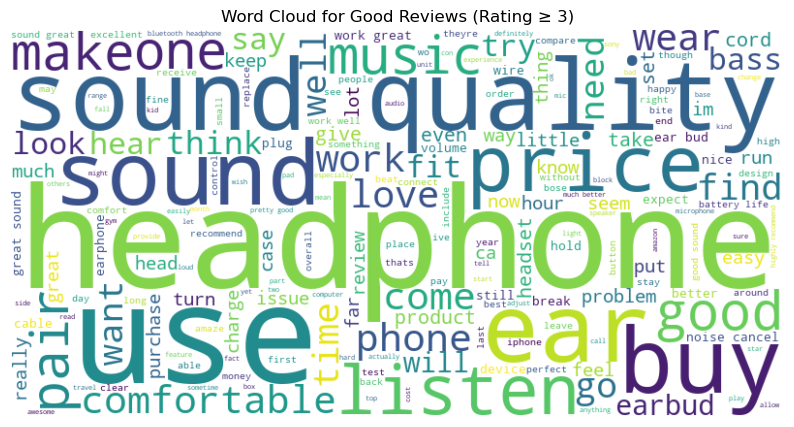

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtering reviews for good and bad ratings
good_reviews = data[data['overall'] >= 3]['reviewText'].str.cat(sep=' ')


# Generating a word cloud for good reviews
good_wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(good_reviews)

# Display the word cloud for good reviews
plt.figure(figsize=(10, 7))
plt.imshow(good_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Good Reviews (Rating ≥ 3)')
plt.show()



# Word Cloud Bad Ratings

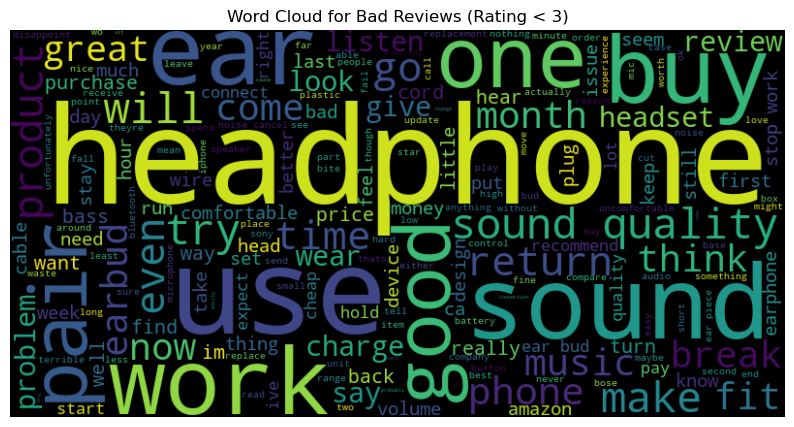

In [15]:
bad_reviews = data[data['overall'] < 3]['reviewText'].str.cat(sep=' ')
# Generating a word cloud for bad reviews
bad_wordcloud = WordCloud(width=800, height=400, background_color ='black').generate(bad_reviews)

# Display the word cloud for bad reviews
plt.figure(figsize=(10, 7))
plt.imshow(bad_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Bad Reviews (Rating < 3)')
plt.show()

# Pie Chart Distribution of Ratings vs. the No. of Reviews

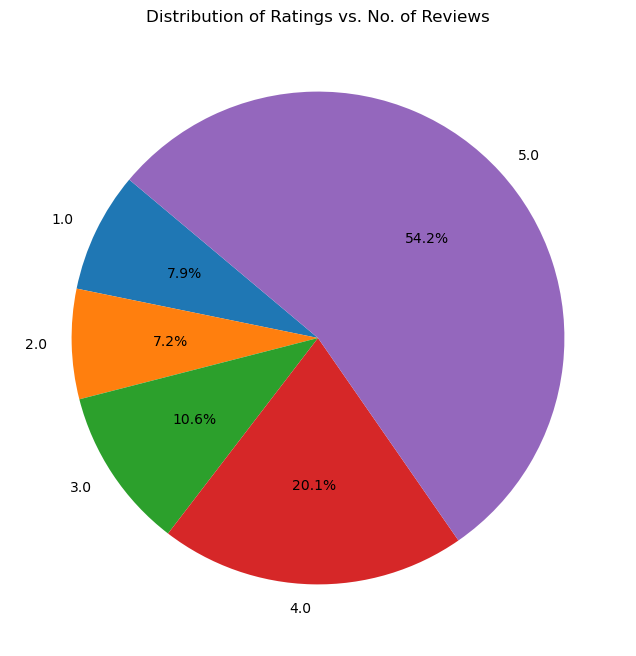

In [16]:
import matplotlib.pyplot as plt

# f. Pie Chart for Distribution of Ratings vs. No. of Reviews
ratings_distribution = data['overall'].value_counts().sort_index()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(ratings_distribution, labels=ratings_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings vs. No. of Reviews')
plt.show()



In [17]:
reviews_count_by_title_year = top_products_data.groupby(['title', 'reviewYear']).size()

max_reviews_year_per_product = reviews_count_by_title_year.unstack().idxmax(axis=1)

print("Year with Maximum Reviews per Product:")
print(max_reviews_year_per_product)


Year with Maximum Reviews per Product:
title
panasonic headphones on-ear lightweight with xbs rp-ht21 (black &amp; silver)                                                                                                           2016
sony mdrzx100 headphones (black)                                                                                                                                                        2014
sony mdrzx100 zx series stereo headphones (blue)                                                                                                                                        2014
toysdone wireless headphones stereo earbuds wireless sport earphones for running with mic (6 hours play time, ipx4 sweatproof, secure ear hooks design)-black/green                     2015
xs earbuds with microphone and volume control, bluetooth headphones earphones noise canceling, xs max earphones with mic compatible with iphone 7/7 plus/iphone 8/8 plus/x xr/xs max    2015
dtype: int

In [18]:
year_with_max_customers = data.groupby('reviewYear')['reviewerID'].nunique().idxmax()
max_customers = data.groupby('reviewYear')['reviewerID'].nunique().max()


In [19]:
year_with_max_customers,max_customers

(2016, 41816)

# Feature Extraction and Model Evaluation

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

# Step 2: Convert ratings into categories
data['Rating_Class'] = data['overall'].apply(lambda x: 'Good' if x > 3 else ('Average' if x == 3 else 'Bad'))

# Step 3: Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    data['reviewText'], data['Rating_Class'], test_size=0.25, random_state=42)

# Step 4: Feature Extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Step 5: Initialize machine learning models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": LinearSVC(),
    "Decision Tree": DecisionTreeClassifier()
}

# Step 6: Train and evaluate the models
for name, model in models.items():
    clf = make_pipeline(tfidf_vectorizer, model)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred, digits=3))
    print("-" * 60)



/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
              precision    recall  f1-score   support

     Average      0.467     0.146     0.222      5163
         Bad      0.701     0.634     0.666      7227
        Good      0.863     0.964     0.911     36071

    accuracy                          0.828     48461
   macro avg      0.677     0.581     0.600     48461
weighted avg      0.797     0.828     0.801     48461

------------------------------------------------------------
Model: Naive Bayes
              precision    recall  f1-score   support

     Average      1.000     0.001     0.002      5163
         Bad      0.948     0.055     0.105      7227
        Good      0.751     1.000     0.858     36071

    accuracy                          0.753     48461
   macro avg      0.900     0.352     0.321     48461
weighted avg      0.807     0.753     0.654     48461

------------------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   sup

# Collaborative Filtering

In [21]:
import pandas as pd

# Load the data
data_path = '/Users/samanyukamra/Dropbox/Mac/Documents/downloadss/final_hp_col_4.csv'  # Update this with the path to your file
df = pd.read_csv(data_path)

In [22]:
#a) Create a user-item rating matrix
itemratingmatrix = df.pivot_table(index='reviewerID', columns='asin', values='overall')

In [23]:
#b) Normalize the ratings, by using min-max scaling on user’s reviews
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
itemratingmatrix[itemratingmatrix.columns] = scaler.fit_transform(itemratingmatrix)

In [24]:
#c) Create a user-user recommender system - i.e,
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

cosine_sim = cosine_similarity(itemratingmatrix.fillna(0))
cosine_sim_df = pd.DataFrame(cosine_sim, index=itemratingmatrix.index, columns=itemratingmatrix.index)

In [25]:
reviewer_ids = itemratingmatrix.index

In [26]:
import numpy as np

def find_topn_similar(mat, user_ids, n):
    sim_indices = []
    sim_ids = []

    for index, user_id in enumerate(user_ids):
        ind = np.argsort(-mat[index])[1:n+1]  # Exclude the first index (self-similarity)
        sim_indices.append(ind)
        sim_uid = user_ids[ind]
        sim_ids.append(sim_uid)
        sim_uid_str = ", ".join(sim_uid.tolist())
        print(f"Current User ID: {user_id}, Index: {index}, Top {n} Similar USERIDs: {sim_uid_str}")
    
    return np.array(sim_indices)

In [27]:
print(find_topn_similar(cosine_sim, reviewer_ids, 10)) #top10

Current User ID: A007917716EGEEP4D8LB, Index: 0, Top 10 Similar USERIDs: A3CT4Q5WG3GBBY, A2Q299PLY24VZ0, A2YXS8NCIO205E, A2Z2YTGZ3OGMAJ, A3I32W4PS9KUPX, A3IJPMCC9J9JBA, A3IJBYYFNQL5W4, A3IGZNV5O2NWAH, A3IGN7Z4YBLNRG, A3IFM3OHGBVWSS
Current User ID: A0232781HWIYKC30FDSP, Index: 1, Top 10 Similar USERIDs: A3IJPMCC9J9JBA, A3IJBYYFNQL5W4, A3IGZNV5O2NWAH, A3IGN7Z4YBLNRG, A3IFM3OHGBVWSS, A3IEMR49JFJURT, A3IE6K8J9LSXCY, A3ICO9RV5S74J5, A3ICGP2E80L7XI, A3I9KRWIKJAF49
Current User ID: A102BVVRFDZIVW, Index: 2, Top 10 Similar USERIDs: A1KJBHY1SN07X6, A1KJD6CJH8IDQO, A1KOD57FFTJBH6, A2KJNEOM8RS344, AGY33U94MENOC, AGVV1MOGRSQ75, AGVPOK35JQT4D, A3DM6TOT9XMPLT, A3DW0986GWJHR9, A3DXDM861K4DE
Current User ID: A102RAGFDFB01O, Index: 3, Top 10 Similar USERIDs: A1TBHBX59DRLCL, A3LT95FKJMBX0H, A3LZKDZ5VW8FKP, A35QNN236XCDJF, A2932W1OU2H05Y, A1TMNDCYOTNO8F, A1AT5RE89LSXTN, A2909N5BJGCXF, A2PQ22A4W3DL75, A3M9QIMHXOTA1D
Current User ID: A102U8331KK8EQ, Index: 4, Top 10 Similar USERIDs: A3HB7JAOKBMAUC, AIHDXC

Average MAE for K=10: 0.019553226662746684
Average MAE for K=20: 0.0275518674524134
Average MAE for K=30: 0.03561213805880214
Average MAE for K=40: 0.043987512383497976
Average MAE for K=50: 0.051120158676320936


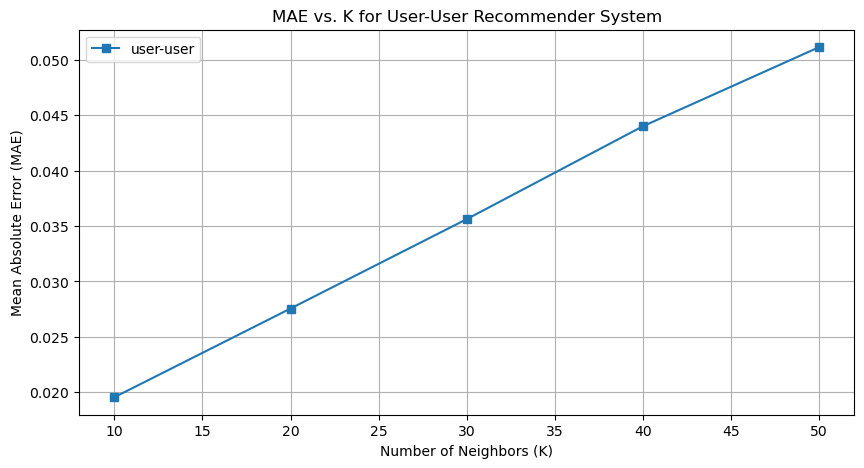

In [28]:
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt


#def predrating(simusers, tr):
#    preds = np.nanmean(tr[simusers, :], axis=0)
#    return preds

def predrating(simusers, tr):
    ratings_sum = np.sum(tr[simusers, :], axis=0)
    num_ratings = np.sum(tr[simusers, :] != 0, axis=0)          #not considering zeroes as zeroes represent NANs
    preds = np.divide(ratings_sum, num_ratings, out=np.zeros_like(ratings_sum), where=num_ratings != 0)
    return preds

#KFold validation
num_folds = 5
kmaes_ = {}
kf = KFold(n_splits=num_folds, shuffle=True, random_state=1)
itemratingmatrix_nonan = itemratingmatrix.fillna(0)

for k in [10, 20, 30, 40, 50]:
    fold_maes = []  

    for train_, test_ in kf.split(itemratingmatrix_nonan):
        tr = itemratingmatrix_nonan.iloc[train_].to_numpy()
        tst = itemratingmatrix_nonan.iloc[test_].to_numpy()
        
        trainsim = cosine_similarity(tr)
        topnind = np.argsort(-trainsim, axis=1)[:, 1:k+1]

        for testpos, test_user_ix in enumerate(test_):
            simusers = topnind[testpos, :k]
            predicted_ratings = predrating(simusers, tr)
            realval = tst[testpos, :]
            fold_maes.append(mean_absolute_error(realval[~np.isnan(realval)], predicted_ratings[~np.isnan(realval)]))
    
    avg_mae = np.mean(fold_maes)
    kmaes_[k] = avg_mae
    print(f"Average MAE for K={k}: {avg_mae}")
    
# Plotting MAE vs. K for Item-Item Recommender System
plt.figure(figsize=(10, 5))
plt.plot(list(kmaes_.keys()), list(kmaes_.values()), label='user-user', marker='s')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. K for User-User Recommender System')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
Matrix_items = itemratingmatrix.fillna(0).T

In [30]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

cosinesim2 = cosine_similarity(Matrix_items)
product_ids = Matrix_items.index.tolist()

def findsimilaritems(mat, item_ids, n):
    sim_indices = []
    sim_items = []

    for index, item_id in enumerate(item_ids):
        ind = np.argsort(-mat[index])[1:n+1]
        sim_indices.append(ind)
        sim_item_ids = [item_ids[i] for i in ind]
        sim_items.append(sim_item_ids)
        sim_item_str = ", ".join(sim_item_ids)
        print(f"Current Item ID: {item_id}, Index: {index}, Top {n} Similar Item IDs: {sim_item_str}")
    
    return np.array(sim_indices)

for N in [10, 20, 30, 40, 50]:
    print(f"\nFinding top {N} similar items for each item:")
    findsimilaritems(cosinesim2, product_ids, N)


Finding top 10 similar items for each item:
Current Item ID: B0052Z83KC, Index: 0, Top 10 Similar Item IDs: B019AUM2JC, B018WWJJGI, B018TQSW4C, B018LC5ZGC, B018GDDECI, B018E9CZHY, B018E9CX9E, B017PWAWIA, B017J31L80, B017IRQJPM
Current Item ID: B005GQBVWO, Index: 1, Top 10 Similar Item IDs: B00BKEQBI0, B0052Z83KC, B0176BWEYU, B017IHAXYK, B017IRQJPM, B017J31L80, B017PWAWIA, B018E9CX9E, B018E9CZHY, B018GDDECI
Current Item ID: B007V7GNPG, Index: 2, Top 10 Similar Item IDs: B00DM2APM6, B0052Z83KC, B0176BWEYU, B017IHAXYK, B017IRQJPM, B017J31L80, B017PWAWIA, B018E9CX9E, B018E9CZHY, B018GDDECI
Current Item ID: B00BKEQBI0, Index: 3, Top 10 Similar Item IDs: B011VB1X6Q, B012VQE8LM, B0106IS5XY, B00I3Q5I8M, B00ZABBRZQ, B01D84D3IU, B00FI16HS0, B00DM2APM6, B0163HRGSW, B017PWAWIA
Current Item ID: B00BLA5PYY, Index: 4, Top 10 Similar Item IDs: B0052Z83KC, B019AUM2JC, B018WWJJGI, B018TQSW4C, B018LC5ZGC, B018GDDECI, B018E9CZHY, B018E9CX9E, B017PWAWIA, B017J31L80
Current Item ID: B00C80UFJQ, Index: 5, T

Average MAE for K=10: 0.07085349582697766
Average MAE for K=20: 0.14230967550378845
Average MAE for K=30: 0.18709228321400156
Average MAE for K=40: 0.2013456835453653
Average MAE for K=50: 0.2230081911665046


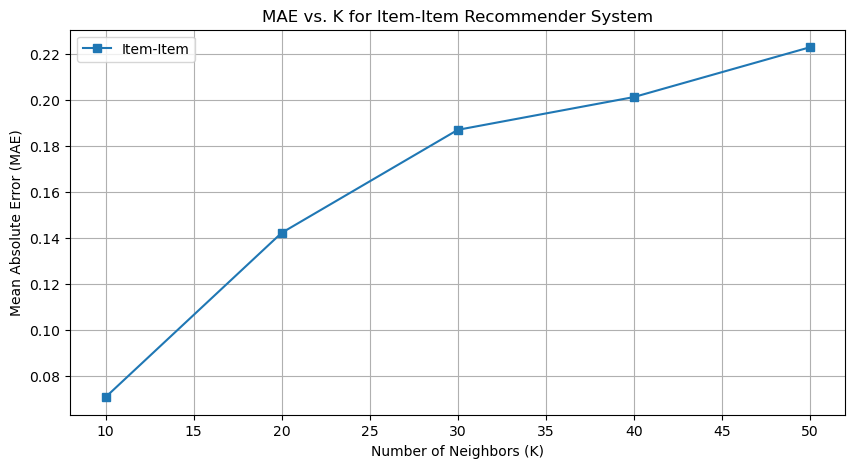

In [31]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

#KFold validation
num_folds = 5
kmaes = {}
kf = KFold(n_splits=num_folds, shuffle=True, random_state=1)

for k in [10, 20, 30, 40, 50]:
    fold_maes = []  
    for train_, test_ in kf.split(Matrix_items):
        tr = Matrix_items.iloc[train_].to_numpy()
        tst = Matrix_items.iloc[test_].to_numpy()
        sims = cosine_similarity(tr)
        topnind = np.argsort(-sims, axis=1)[:, 1:k+1]

        for testpos, testitem in enumerate(test_):
            simitems = topnind[testpos, :k]
            predicted_ratings = predrating(simitems, tr)
            realval = tst[testpos, :]
            fold_maes.append(mean_absolute_error(realval[~np.isnan(realval)], predicted_ratings[~np.isnan(realval)]))
    
    avg_mae = np.mean(fold_maes)
    kmaes[k] = avg_mae
    print(f"Average MAE for K={k}: {avg_mae}")
    
# Plotting MAE vs. K for Item-Item Recommender System
plt.figure(figsize=(10, 5))
plt.plot(list(kmaes.keys()), list(kmaes.values()), label='Item-Item', marker='s')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. K for Item-Item Recommender System')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
prodratingsums = itemratingmatrix.sum(axis=0)
top10 = prodratingsums.sort_values(ascending=False).head(10)

print("Top 10 Products by User Sum Ratings for category 'SmartWatch':")
print(top10)

Top 10 Products by User Sum Ratings for category 'SmartWatch':
asin
B00BKEQBI0    677.00
B00MQ99YB4    573.25
B0106IS5XY    297.00
B00IGIEAAO    277.25
B011VB1X6Q    256.50
B0163HRGSW    183.75
B015N8XRHG    176.50
B00DM2APM6    172.00
B00N9OAQI0    137.00
B017PWAWIA     81.50
dtype: float64
